## Code used for Taylor et al. (2024)
### Chapter 5
### 'Evolution and architecture of an overbank in an ocean-facing canyon-fill'

In [15]:
# Import packages

import numpy as np
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
import statsmodels.api as sm
from statsmodels.stats.weightstats import DescrStatsW
%config InlineBackend.figure_format='retina'
sns.set_style('ticks')


In [16]:
# Load data

df=pd.read_csv('data/pb_beds_fa.csv')



In [17]:
# Grain-size 

gs_num_dict = {
    'm':1,
    'vfsi':2,
    'fsi':3,
    'csi':4,
    'vfs':5,
    'fs':6,
    'ms':7,
    'cs':8,
    'vcs':9,
    'gr':10,
#     None: 0
}

gs_phi_dict = {
    'm':8.0,
    'vfsi':7.0,
    'fsi':6.0,
    'csi':4.0,
    'vfs':3.0,
    'fs':2.0,
    'ms':1.0,
    'cs':0.0,
    'vcs':-1.0,
    'gr':-2.0,
#     None: 0
}

df['gs_base_num'] = df['gs_base'].replace(gs_num_dict)
df['gs_top_num'] = df['gs_top'].replace(gs_num_dict)

df[['gs_base_num','gs_top_num']] = df[['gs_base_num','gs_top_num']].apply(pd.to_numeric, errors='coerce')

df['gs_min'] = df[['gs_base_num', 'gs_top_num']].max(axis=1)
df['gs_max'] = df[['gs_base_num', 'gs_top_num']].min(axis=1)

In [18]:
# Data filtering 

# Get facies associations 

margin = df[df.FA_name == 'margin'] 
lower_overbank = df[df.FA_name == 'lower_overbank']  
upper_overbank = df[df.FA_name == 'upper_overbank']
overbank = df[(df["FA_number"] == 3) | (df["FA_number"] == 4)]

# Get sand bed thickness

sand_th = df[(df["sand/mud"] == 's')]
mud_th = df[(df["sand/mud"] == 'm')]
upper_overbank_sand_beds = upper_overbank[(upper_overbank["sand/mud"] == 's')]
lower_overbank_sand_beds = lower_overbank[(lower_overbank["sand/mud"] == 's')]
#order 




In [19]:
upper_overbank_sand_beds.head()

,log,FA_name,FA_number,area,marker bed,bed_number,bed_thickness,sand/mud,gs_base,gs_top,event_th,sand_proportion,Unnamed: 12,Unnamed: 13,gs_base_num,gs_top_num,gs_min,gs_max
0,PBO2a,upper_overbank,4,proximal,NaN,1,30.0,s,cs,csi,NaN,NaN,NaN,NaN,8.0,4.0,8.0,4.0
2,PBO2a,upper_overbank,4,proximal,NaN,3,1.5,s,fs,fs,NaN,NaN,NaN,NaN,6.0,6.0,6.0,6.0
4,PBO2a,upper_overbank,4,proximal,NaN,5,4.0,s,fs,fs,NaN,NaN,NaN,NaN,6.0,6.0,6.0,6.0
6,PBO2a,upper_overbank,4,proximal,NaN,7,4.0,s,fs,fs,NaN,NaN,NaN,NaN,6.0,6.0,6.0,6.0
8,PBO2a,upper_overbank,4,proximal,NaN,9,3.0,s,fs,fs,NaN,NaN,NaN,NaN,6.0,6.0,6.0,6.0


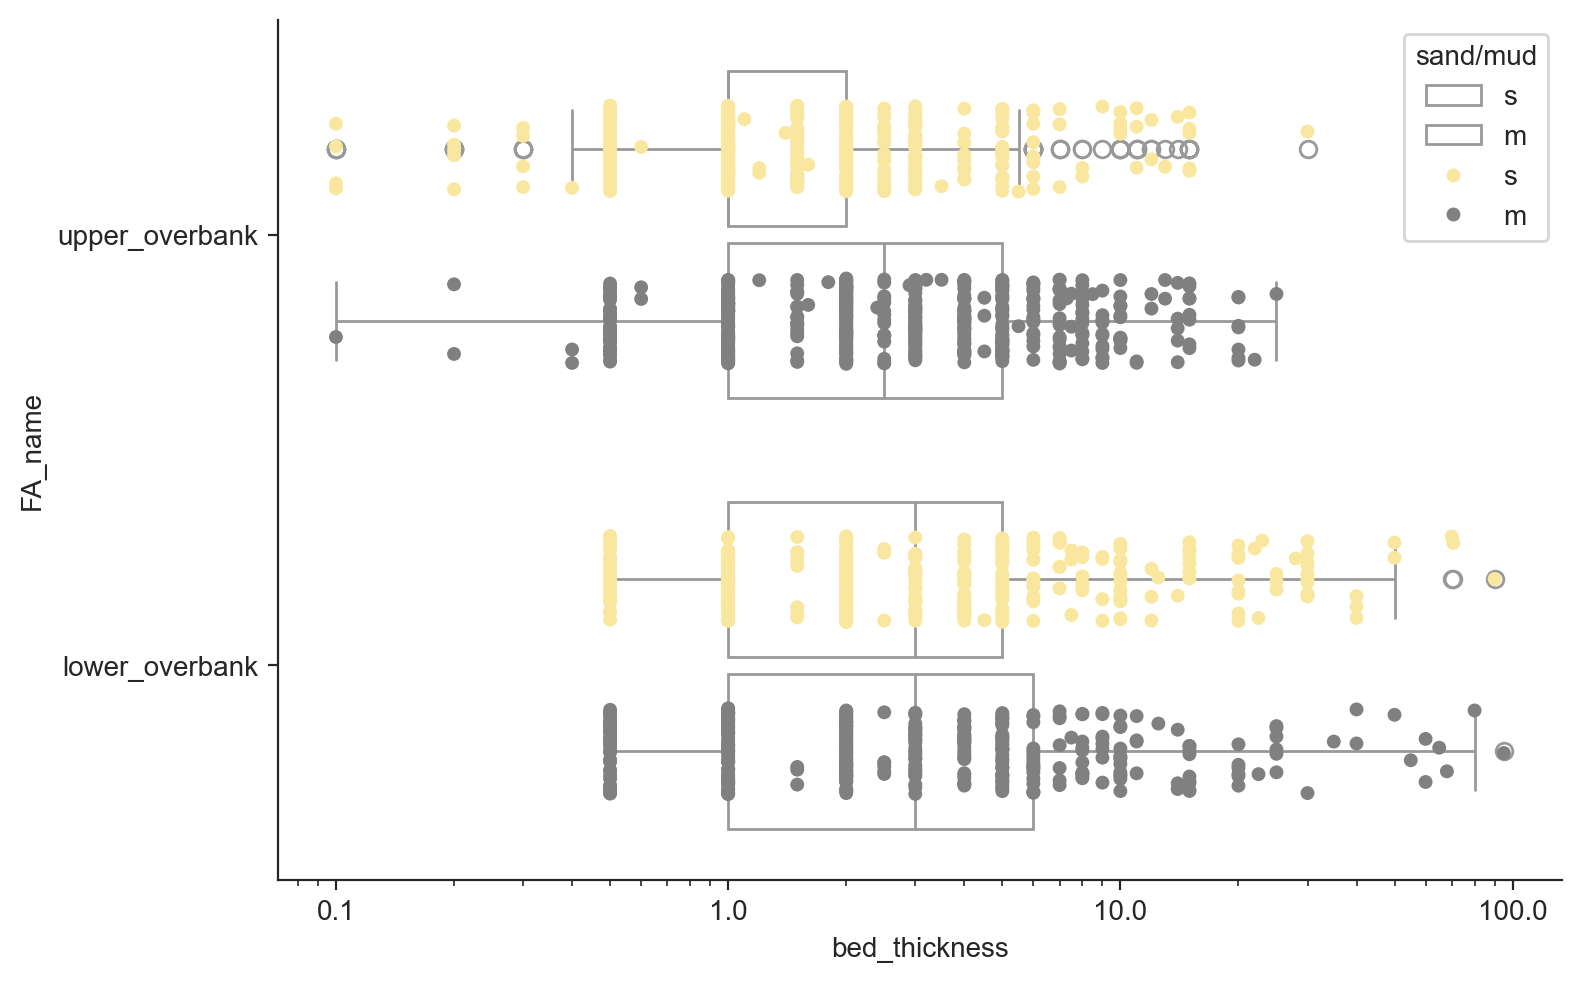

In [20]:
# All beds distribution - box plot
fig, ax = plt.subplots(figsize=(8, 5))

sns.despine(fig)
sns.boxplot(overbank, x="bed_thickness", y="FA_name", log_scale=True, hue="sand/mud",
                 gap=.1, palette={"s": 'w', "m": 'w'})
sns.stripplot(overbank, x='bed_thickness', y='FA_name', log_scale=True, dodge=True, jitter=.2, hue="sand/mud", palette={"s": "#F9E79F", "m": ".5"})
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([0.1, 1, 10, 100])
plt.tight_layout()

C:\Users\willi\AppData\Local\Temp\ipykernel_420\2061155621.py:22: UserWarning:

FixedFormatter should only be used together with FixedLocator

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


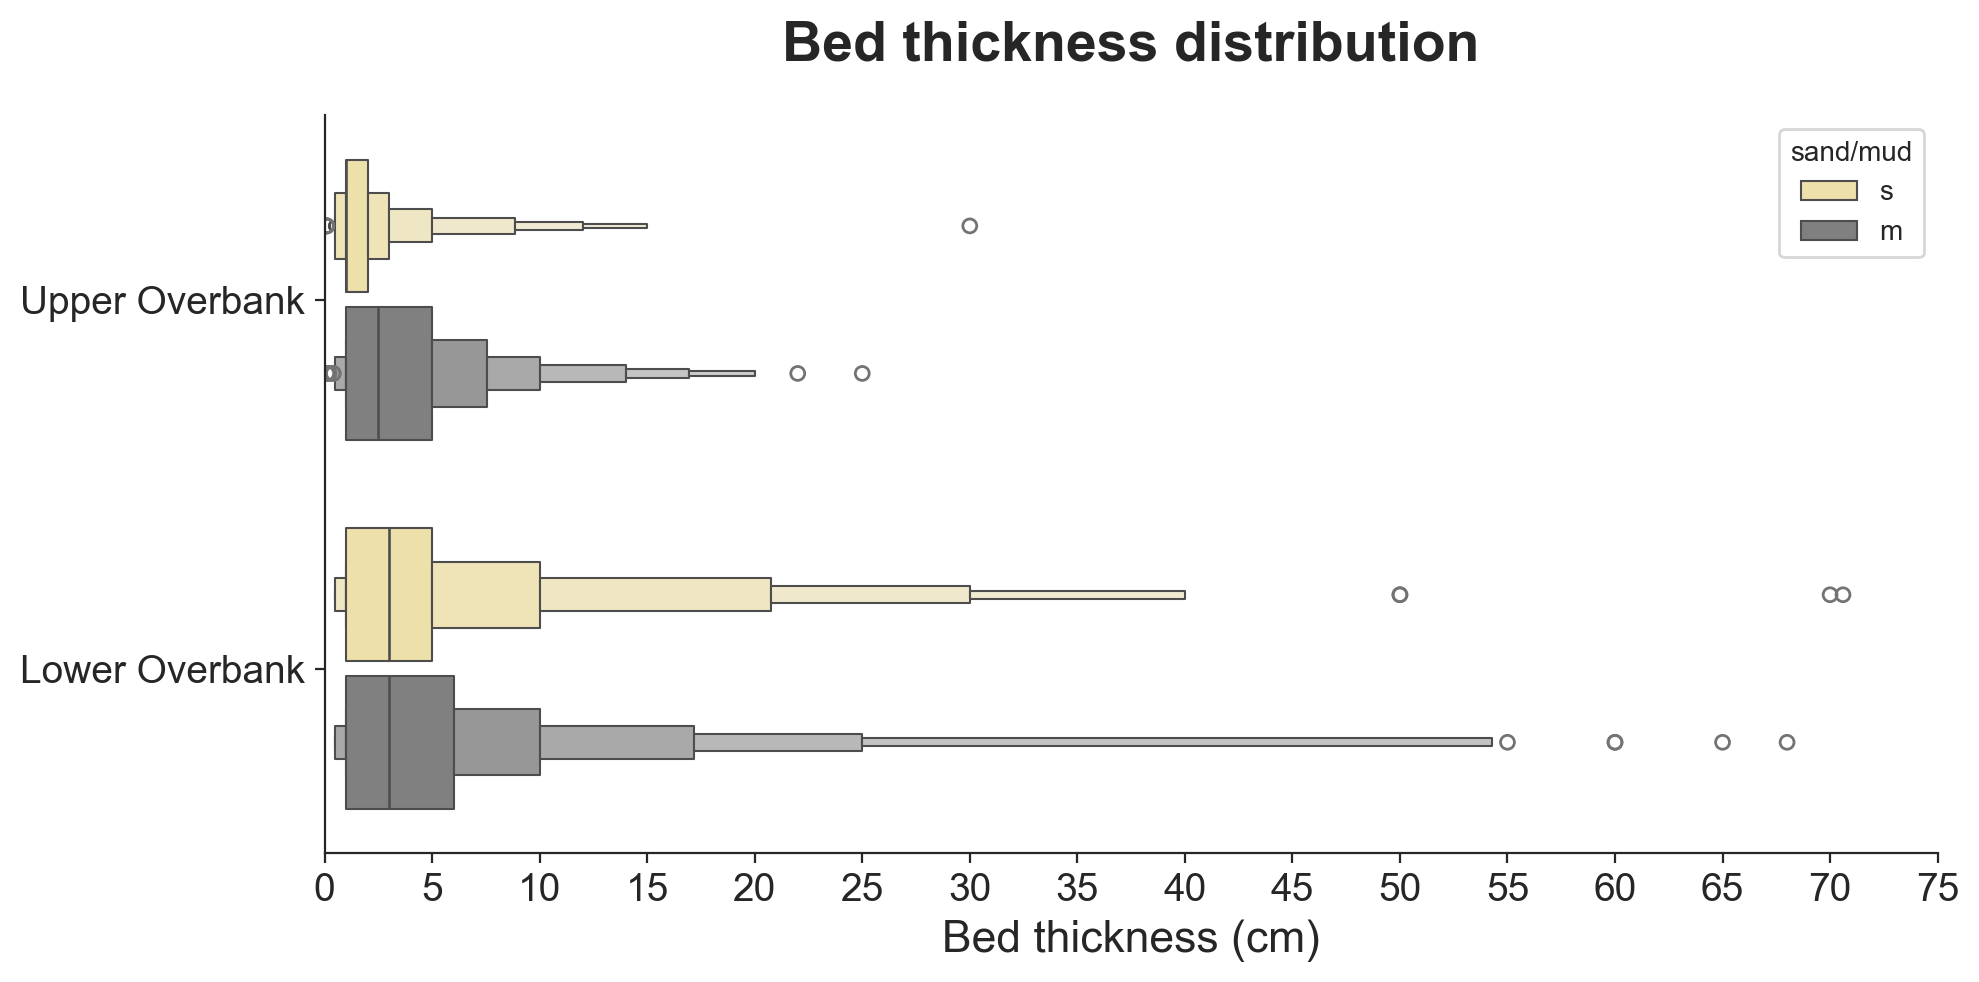

In [21]:
# All beds distribution - boxen plot 
fig, ax = plt.subplots(figsize=(10, 5))



sns.boxenplot(overbank, x="bed_thickness", y="FA_name", hue="sand/mud",
                 gap=.1, palette={"s": "#F9E79F", "m": ".5"})

for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

labels = ['Upper Overbank', 'Lower Overbank']

# Change plot title and labels 
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75])
ax.set_title("Bed thickness distribution", size = 20, pad=20, fontdict={'fontweight':'bold'})
ax.set_ylabel(ylabel=None)
ax.set_xlabel("Bed thickness (cm)", size = 16)
ax.set_xlim(0,75)
# Modify tick and tick parameters
ax.tick_params(labelsize = 14) 
ax.set_yticklabels(labels) 


plt.tight_layout()

plt.savefig('figs/beds_distribution.eps', dpi=300)


plt.show()

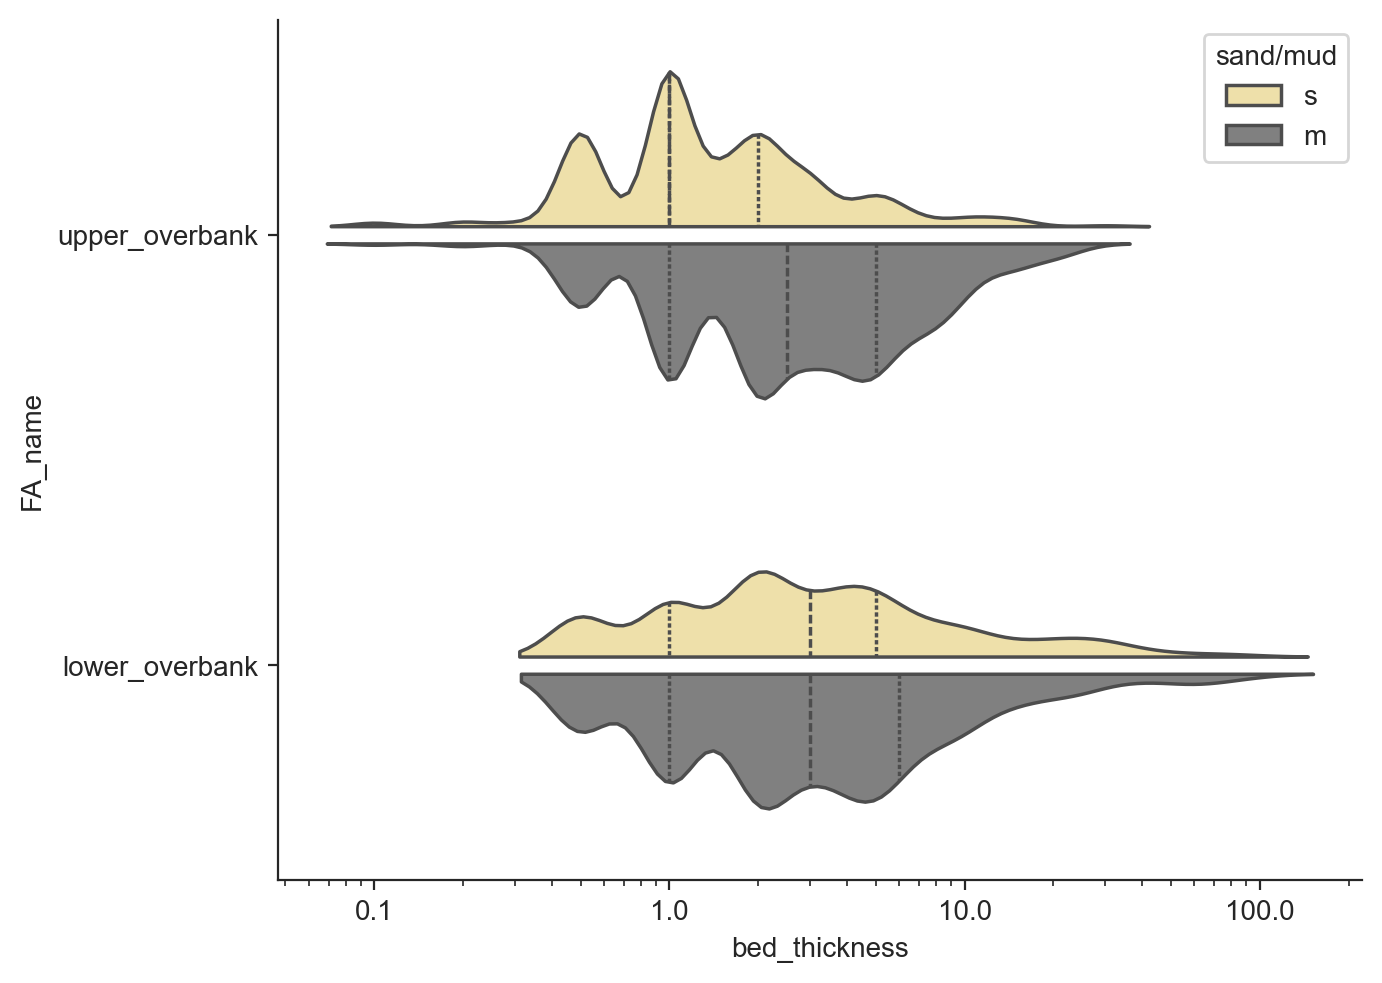

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.despine(fig)
sns.violinplot(overbank, x="bed_thickness", y="FA_name", log_scale=True, hue="sand/mud",
               inner="quart", split=True, gap=.1, bw_adjust=.7, palette={"s": "#F9E79F", "m": ".5"})
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([0.1, 1, 10, 100])
plt.tight_layout()